In [1]:
from torchvision.models import mobilenet_v3_large

In [2]:
model = mobilenet_v3_large(weights="DEFAULT")

In [3]:
from torch import nn

In [4]:
classifier = nn.Sequential(
    nn.Linear(in_features=960, out_features=1280),
    nn.Hardswish(),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=1),
    nn.Sigmoid()
)

In [5]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [6]:
model.classifier = classifier

In [7]:
model.classifier

Sequential(
  (0): Linear(in_features=960, out_features=1280, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1280, out_features=1, bias=True)
  (4): Sigmoid()
)

In [8]:
from torch.utils.data import Dataset, DataLoader

In [9]:
from torchvision.io import read_image

In [10]:
import glob
import PIL

In [11]:
image_paths = glob.glob("/mnt/c/Users/Glenn/Downloads/archive/PetImages/*/*")

In [12]:
import torchvision.transforms as T
from PIL import Image
from matplotlib import pyplot as plt
import torch

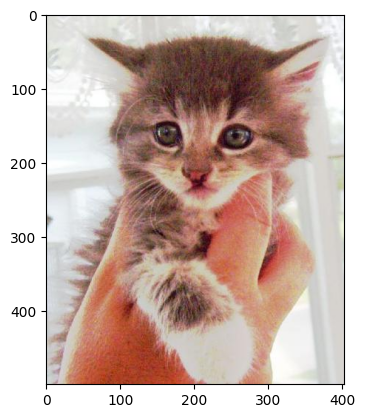

In [13]:
plt.imshow(read_image(image_paths[3]).permute(1, 2, 0))

In [14]:
import re

In [15]:
P = glob.glob("/mnt/c/Users/Glenn/Downloads/archive/PetImages/*/*")

In [16]:
from torchvision.transforms.v2 import Resize

In [41]:
def get_img(path):
    #.to(torch.half)
    return Resize((256,256), antialias=True)(read_image(path)) / 255


def produce_labels(paths):
    data = []
    for path in P:
        if re.search("cat", path, flags=re.IGNORECASE):
            data.append(0)
        else:
            data.append(1)
    return data


class dset(Dataset):
    def __init__(self, transform=None):
        self.file_paths = glob.glob("/mnt/c/Users/Glenn/Downloads/archive/PetImages/*/*")
        self.labels = produce_labels(self.file_paths)

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, index):
        return get_img(self.file_paths[index]), self.labels[index]


In [49]:
loader = DataLoader(dset(), batch_size=4, shuffle=True, num_workers=4)

In [43]:
k = dset()

In [44]:
k.file_paths

['/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/0.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/1.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/100.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/1000.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10000.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10001.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10002.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10003.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10004.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10005.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10006.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10007.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10008.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/PetImages/Cat/10009.jpg',
 '/mnt/c/Users/Glenn/Downloads/archive/

In [45]:
from torchvision.transforms.v2 import ToPILImage

In [68]:
k.__getitem__(0)[0].dtype

torch.float32

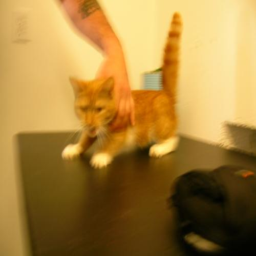

In [46]:
ToPILImage()(k.__getitem__(0)[0])

In [50]:
batch = next(iter(loader))

In [53]:
preds = model(batch[0])

In [61]:
preds.detach().round().squeeze(-1)

tensor([1., 0., 1., 0.])

In [65]:
nn.BCELoss()(preds.detach().round().squeeze(-1), batch[1].to(torch.float32))

tensor(50.)

tensor([0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.])

In [110]:
nn.BCELoss()(torch.rand((12,)), torch.randint(0,2,(12,)).to(torch.float32))

tensor(1.1151)

In [69]:
from torchmetrics.classification import BinaryAccuracy

In [77]:
pred = torch.randint(0,2, (12,))
target = torch.randint(0,2, (12,))

In [76]:
pred

tensor([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [79]:
BinaryAccuracy(threshold=0.2)(pred, target)

tensor(0.4167)